In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:

# load all data
df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(df.shape)
print(df.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

global_active_power: The total active power consumed by the household (kilowatts). <br>
global_reactive_power: The total reactive power consumed by the household (kilowatts) <br/>.
voltage: Average voltage (volts <br>).
global_intensity: Average current intensity (amp <br>s).
sub_metering_1: Active energy for kitchen (watt-hours of active ene<br>gy).
sub_metering_2: Active energy for laundry (watt-hours of active ene <br>rgy).
sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [26]:
df['Voltage'].value_counts()

Voltage
?          25979
241.180     3559
241.120     3289
241.350     3285
241.020     3284
           ...  
225.120        1
224.770        1
224.680        1
224.240        1
253.160        1
Name: count, Length: 2838, dtype: int64

In [3]:
data = df.replace('?',None)

In [31]:
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data_ = data.astype("float64")

<Axes: xlabel='datetime'>

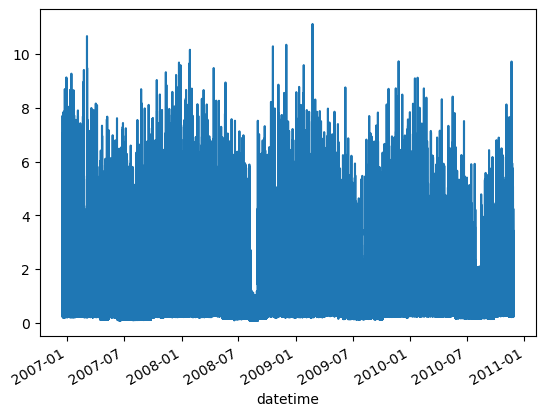

In [6]:
data_['Global_active_power'].plot()

<Axes: xlabel='datetime'>

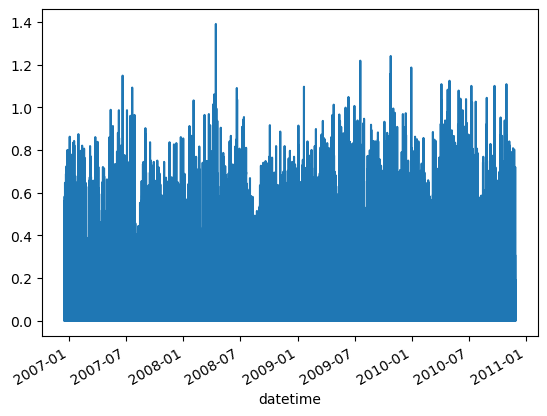

In [39]:
data_['Global_reactive_power'].plot()

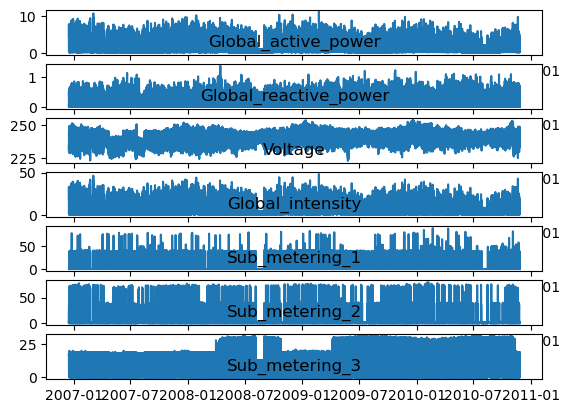

In [42]:
# line plot for each variable
plt.figure()
for i in range(len(data_.columns)):
 plt.subplot(len(data_.columns), 1, i+1)
 name = data_.columns[i]
 plt.plot(data_[name])
 plt.title(name, y=0)
plt.show()

In [7]:
data_['year'] = data_.index.year
data_

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010


In [48]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   year                   int32  
dtypes: float64(7), int32(1)
memory usage: 132.9 MB


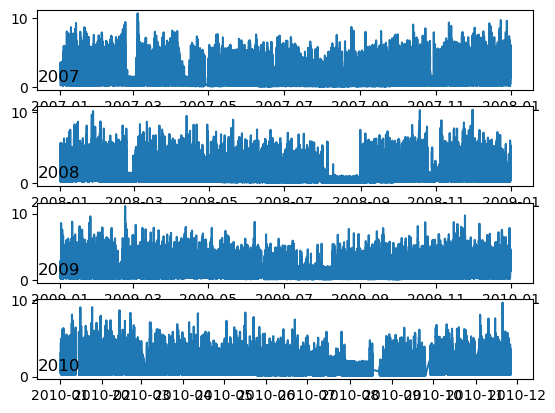

In [49]:
#Zoom in to global active power

years = [2007, 2008, 2009, 2010]
plt.figure()
for i in range(len(years)):
 # prepare subplot
 ax = plt.subplot(len(years), 1, i+1)
 # determine the year to plot
 year = years[i]
 # get all observations for the year
 result = data_.loc[data_['year']==year]
 # plot the active power for the year
 plt.plot(result['Global_active_power'])
 # add a title to the subplot
 plt.title(str(year), y=0, loc='left')
plt.show()

In [8]:
data_['month'] = data_.index.month
data_

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month
datetime,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11


In [9]:
x = data_.groupby('year').get_group(2007)

In [59]:
x['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [61]:
x[x['month']==1]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month
datetime,,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007,1
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007,1
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007,1
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007,1
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007,1
...,...,...,...,...,...,...,...,...,...
2007-01-31 23:55:00,0.334,0.130,243.80,1.4,0.0,0.0,0.0,2007,1
2007-01-31 23:56:00,0.332,0.126,243.26,1.4,0.0,0.0,0.0,2007,1
2007-01-31 23:57:00,0.328,0.124,242.59,1.4,0.0,0.0,0.0,2007,1


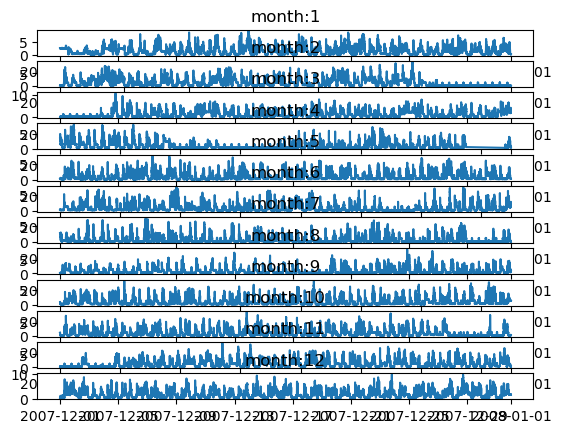

In [71]:
plt.figure()
for i in x['month'].unique():
    
    ax = plt.subplot(len(x['month'].unique()), 1, i)
    data_to_plot = x[x['month']==i]
    plt.plot(data_to_plot['Global_active_power'])
    plt.title(f'month:{i}')
plt.show()

In [10]:
data_['days'] = data_.index.day
data_

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,days
datetime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16
...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26


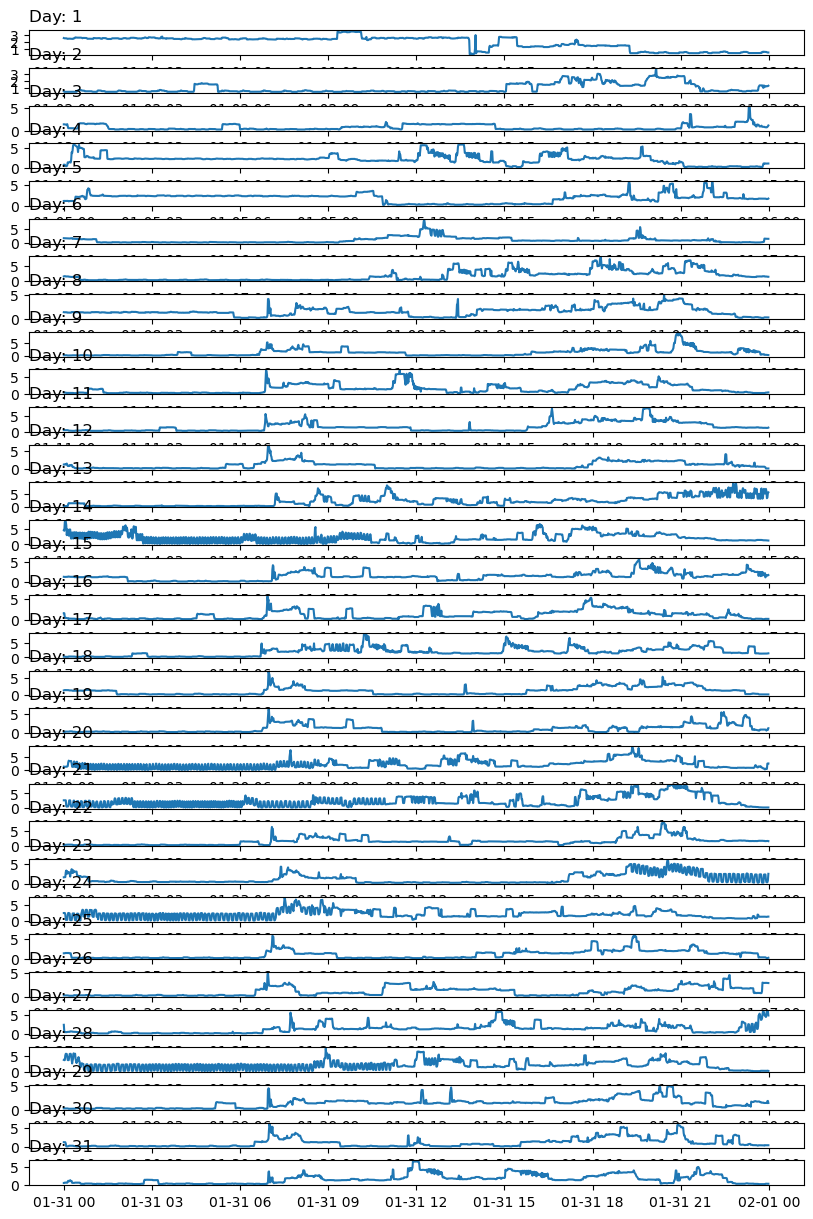

In [81]:
x = data_.groupby('year').get_group(2007)
x_ = x[x['month']==1]

plt.figure(figsize=(10, 15))  # Increase the figure size (width, height)

unique_days = x_['days'].unique()

for i, day in enumerate(unique_days):
    ax = plt.subplot(len(unique_days), 1, i + 1)  # Create subplot
    data_to_plot = x_[x_['days'] == day]
    plt.plot(data_to_plot['Global_active_power'])
    plt.title(f'Day: {day}', y=1.02, loc='left')  # Move the title slightly above the plot
    
    # # Optionally hide x-axis labels for all but the last subplot to reduce clutter
    # if i < len(unique_days) - 1:
    #     ax.set_xticklabels([])

# Improve spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase the space between subplots
plt.tight_layout()
plt.show()

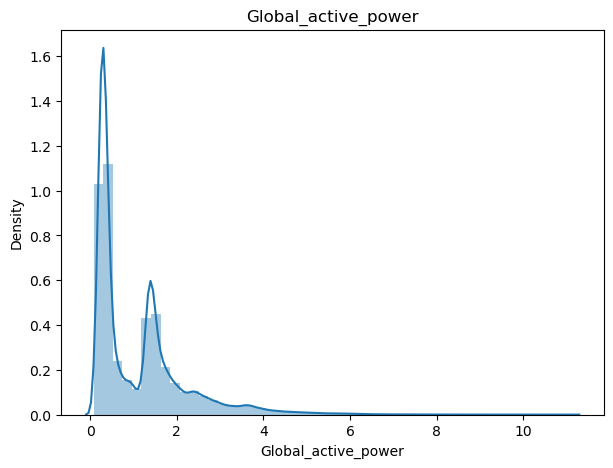

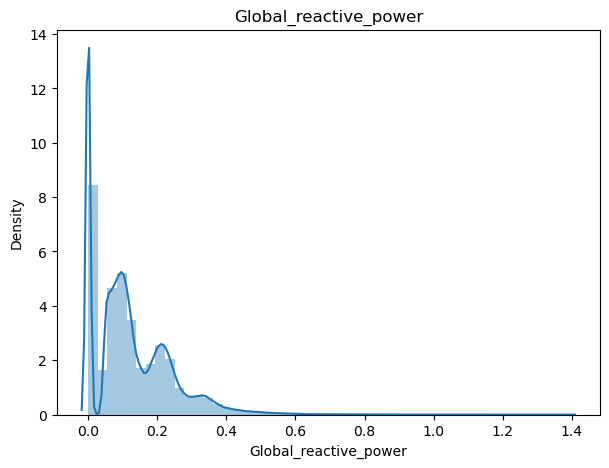

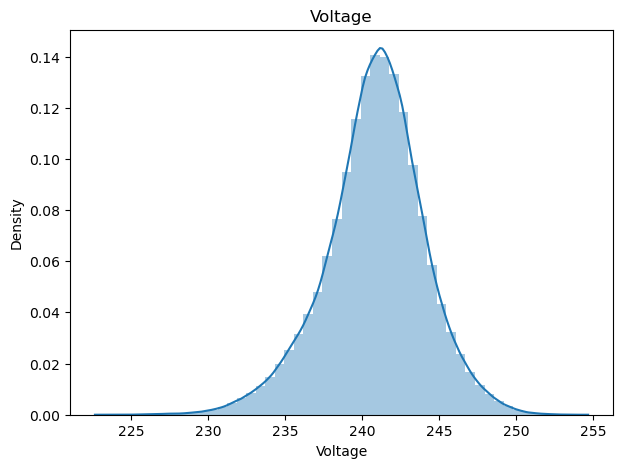

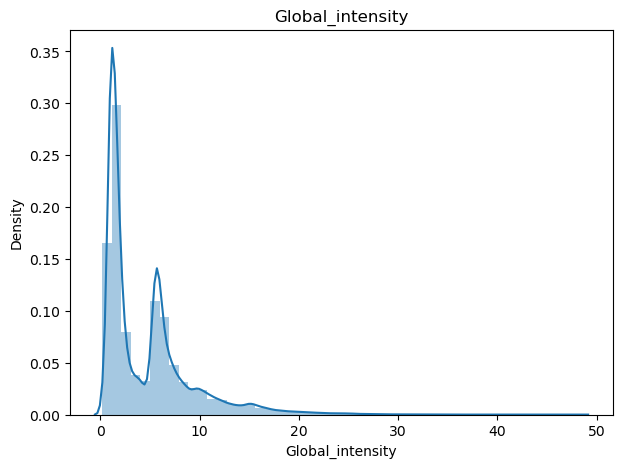

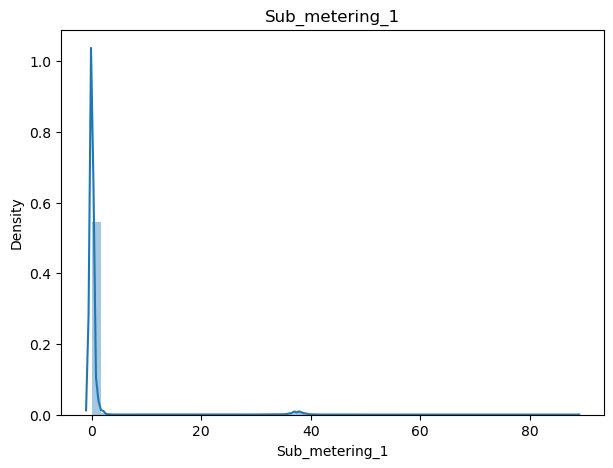

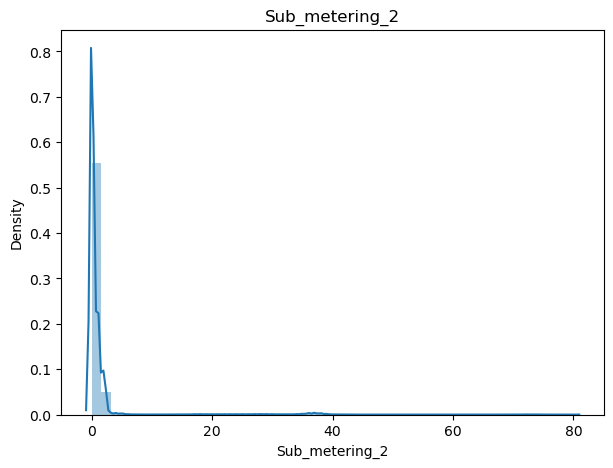

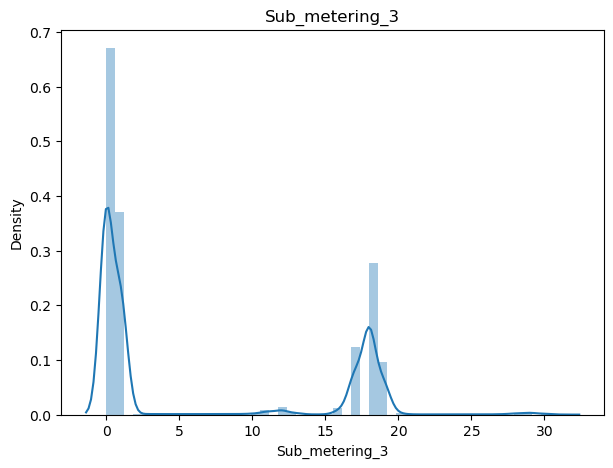

In [84]:
for col in (data_.drop(columns=['month','year','days'])).columns:
    plt.figure(figsize=(7,5))
    plt.title(col)
    sns.distplot(data_[col])
    plt.show()

In [85]:
data_.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
days                     0
dtype: int64

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
data_['Global_active_power'][:50000]

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2007-01-20 10:44:00    3.238
2007-01-20 10:45:00    4.070
2007-01-20 10:46:00    3.648
2007-01-20 10:47:00    3.550
2007-01-20 10:48:00    1.932
Name: Global_active_power, Length: 50000, dtype: float64

In [13]:
dftest = adfuller(data_['Global_active_power'][:10000] ,autolag='AIC')

In [14]:
def stationary(x):
    print("1. ADF : ", dftest[0])
    print("2. p-value", dftest[1])
    print("3. No of Lags : ", dftest[2])
    print("4. No of Observations used for ADF Regression and critical value Calculation ", dftest[3])
    print("5. Critical values : ")

    for key,val in dftest[4].items():
        print("\t", key,": ", val)

In [15]:
stationary(dftest)

1. ADF :  -5.844074340037009
2. p-value 3.718863218077397e-07
3. No of Lags :  37
4. No of Observations used for ADF Regression and critical value Calculation  9962
5. Critical values : 
	 1% :  -3.4310065936361585
	 5% :  -2.861830175207641
	 10% :  -2.5669244551266304


The ADF statistic is lesser than the critical values and the p-value is lesser than the significance alpha (0.05) hence we can reject the null hypothesis -> and accept the alternate hypothesis that "The data is Stationary"

In [16]:
df_quarterly = data_.resample( 'D' ).mean()

In [17]:
df_quarterly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,days
datetime,,,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,2006.0,12.0,16.0
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,2006.0,12.0,17.0
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,2006.0,12.0,18.0
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,2006.0,12.0,19.0
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972,2006.0,12.0,20.0
...,...,...,...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889,2010.0,11.0,22.0
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417,2010.0,11.0,23.0
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889,2010.0,11.0,24.0


<Axes: xlabel='datetime'>

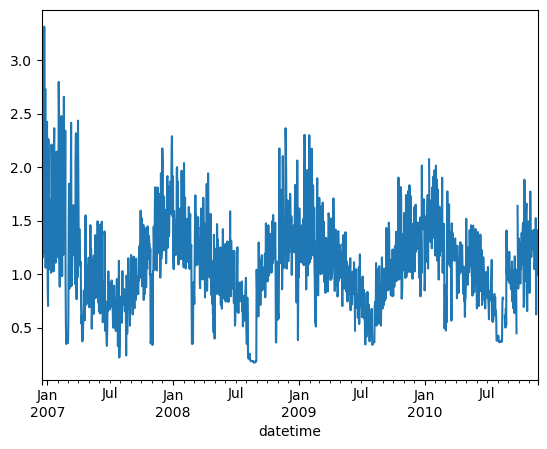

In [99]:
df_quarterly['Global_active_power'].plot()

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

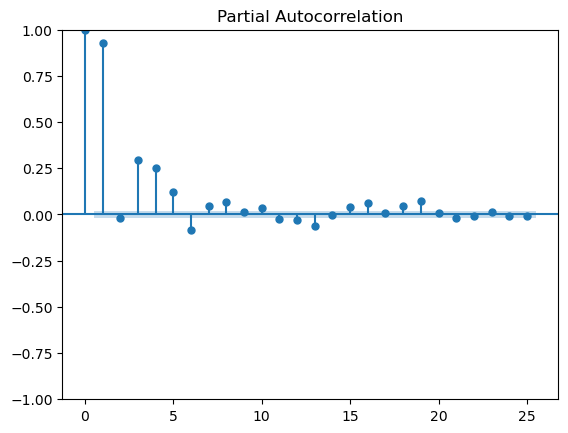

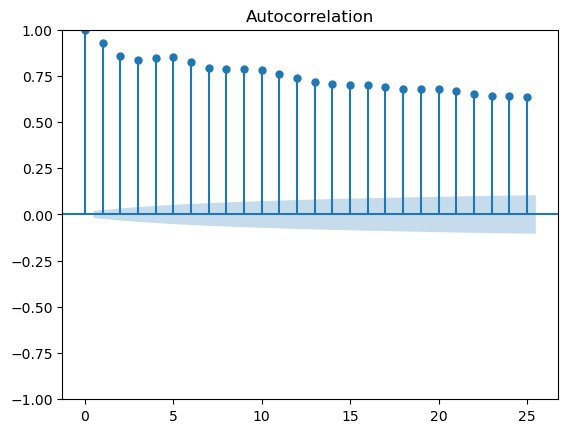

In [20]:
pacf = plot_pacf(data_['Global_active_power'][:10000],lags =25)
acf = plot_acf(data_['Global_active_power'][:10000],lags=25)

In [25]:
from statsmodels.tsa.ar_model import AutoReg

In [85]:
train = data_['Global_active_power'][:10000][:8000]
test = data_['Global_active_power'][:10000][8000:10001]

In [86]:
test

datetime
2006-12-22 06:46:00    0.202
2006-12-22 06:47:00    0.202
2006-12-22 06:48:00    0.246
2006-12-22 06:49:00    0.316
2006-12-22 06:50:00    0.330
                       ...  
2006-12-23 16:01:00    4.932
2006-12-23 16:02:00    4.926
2006-12-23 16:03:00    4.658
2006-12-23 16:04:00    2.870
2006-12-23 16:05:00    2.988
Name: Global_active_power, Length: 2000, dtype: float64

In [30]:
train

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2006-12-22 06:41:00    0.206
2006-12-22 06:42:00    0.206
2006-12-22 06:43:00    0.206
2006-12-22 06:44:00    0.204
2006-12-22 06:45:00    0.202
Name: Global_active_power, Length: 8000, dtype: float64

In [87]:
model = AutoReg(train,lags=2).fit()
pred = model.predict(start=len(train), end=10000-1, dynamic=False)

In [88]:
pred.index = test.index
pred

datetime
2006-12-22 06:46:00    0.279982
2006-12-22 06:47:00    0.353801
2006-12-22 06:48:00    0.423357
2006-12-22 06:49:00    0.488894
2006-12-22 06:50:00    0.550646
                         ...   
2006-12-23 16:01:00    1.557788
2006-12-23 16:02:00    1.557788
2006-12-23 16:03:00    1.557788
2006-12-23 16:04:00    1.557788
2006-12-23 16:05:00    1.557788
Length: 2000, dtype: float64

In [40]:
test.values

array([0.202, 0.202, 0.246, ..., 4.658, 2.87 , 2.988])

In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [89]:
rmse = sqrt(mean_squared_error(test.values,pred))
print(rmse)

1.6365068958642859


In [61]:
pred

datetime
2006-12-22 06:46:00    0.279982
2006-12-22 06:47:00    0.353801
2006-12-22 06:48:00    0.423357
2006-12-22 06:49:00    0.488894
2006-12-22 06:50:00    0.550646
                         ...   
2006-12-23 16:01:00    1.557788
2006-12-23 16:02:00    1.557788
2006-12-23 16:03:00    1.557788
2006-12-23 16:04:00    1.557788
2006-12-23 16:05:00    1.557788
Length: 2000, dtype: float64

In [51]:
test

datetime
2006-12-22 06:46:00    0.202
2006-12-22 06:47:00    0.202
2006-12-22 06:48:00    0.246
2006-12-22 06:49:00    0.316
2006-12-22 06:50:00    0.330
                       ...  
2006-12-23 16:01:00    4.932
2006-12-23 16:02:00    4.926
2006-12-23 16:03:00    4.658
2006-12-23 16:04:00    2.870
2006-12-23 16:05:00    2.988
Name: Global_active_power, Length: 2000, dtype: float64

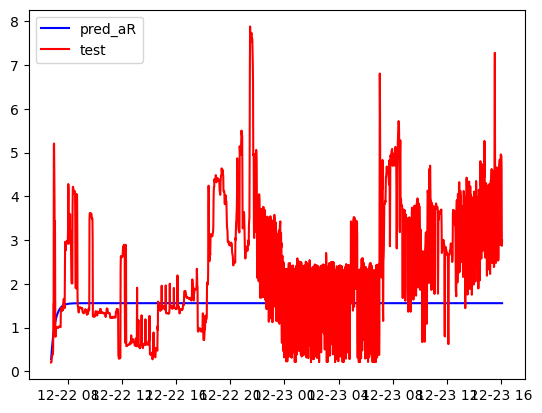

In [90]:
plt.plot(pred,color='b',label='pred_aR')
plt.plot(test,color='r',label='test')
plt.legend()
plt.show()

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model_arima = ARIMA(train, order=(2, 0, 2))
model = model_arima.fit()

# Print the model summary
print(model.summary())


                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                 8000
Model:                  ARIMA(2, 0, 2)   Log Likelihood               -4093.109
Date:                 Fri, 02 Aug 2024   AIC                           8198.219
Time:                         19:25:01   BIC                           8240.142
Sample:                              0   HQIC                          8212.569
                                - 8000                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5810      0.213      7.409      0.000       1.163       1.999
ar.L1          1.2306      0.022     55.078      0.000       1.187       1.274
ar.L2         -0.2411      0.022    -11.135 

In [64]:
pred_arima = model.predict(start=len(train), end=10000-1,typ='levels')
print(pred_arima)

8000    0.241003
8001    0.275397
8002    0.297451
8003    0.316297
8004    0.334172
          ...   
9995    1.581000
9996    1.581000
9997    1.581000
9998    1.581000
9999    1.581000
Name: predicted_mean, Length: 2000, dtype: float64


In [65]:
pred_arima.index = test.index

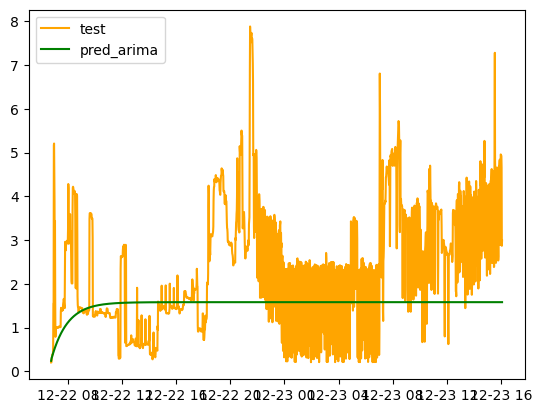

In [66]:
plt.plot(test, color='orange',label='test')
plt.plot(pred_arima,color='green',label='pred_arima')
plt.legend()
plt.show()

In [76]:
import pandas as pd
from scipy.stats import pearsonr

# Ensure your DataFrame 'df' is already defined
# Convert columns to numeric values, coercing errors to NaNs
data1 = pd.to_numeric(data_['Global_active_power'], errors='coerce')
data2 = pd.to_numeric(data_['Global_reactive_power'], errors='coerce')

# Drop missing values
data1 = data1.dropna()
data2 = data2.dropna()

# Ensure both series have the same length after dropping NaNs
min_length = min(len(data1), len(data2))
data1 = data1[:min_length]
data2 = data2[:min_length]

# Calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.247
